<a href="https://colab.research.google.com/github/fabriciosgouveia/Angular_agendacontados/blob/main/FacrioSebastiaoDeGouveia_ValidacaoModeosClusterizacao_V2_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Municípios Brasileiros - Dados IBGE
**Disciplina:** Validação de Modelos de Clusterização  
**Pós-graduação em IA**

## Objetivos do Trabalho
1. Realizar análise exploratória de dados municipais brasileiros
2. Aplicar pré-processamento adequado aos dados
3. **Criar medidas de similaridade para clusterização de séries temporais** ✨ **NOVO**
4. Implementar clusterização com K-Médias e DBScan
5. Validar resultados usando índice de silhueta e outras métricas
6. Comparar e interpretar os resultados obtidos

## Dataset
**Fonte:** Economy and Population of Cities in Brazil (IBGE)  
**Link:** https://www.kaggle.com/datasets/gabrielrs3/economy-and-population-of-cities-in-brazil-ibge

**Características:**
- 5.571 municípios brasileiros
- 14 variáveis (econômicas, demográficas e geográficas)
- Dados de PIB, População, IDH, Receitas e Despesas municipais

# 1. Configuração do Ambiente

## 1.1 Instalação de Bibliotecas Necessárias

In [1]:
# Instalar bibliotecas adicionais (se necessário)
!pip install -q openpyxl scikit-learn matplotlib seaborn pandas numpy scipy

## 1.2 Importação de Bibliotecas

In [2]:
# Manipulação de dados
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

# Configurar tamanho padrão dos gráficos
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Clusterização
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Validação
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Redução de dimensionalidade para visualização
from sklearn.decomposition import PCA

# Utilidades
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import zscore

print("✓ Todas as bibliotecas importadas com sucesso!")
print(f"✓ Versão do pandas: {pd.__version__}")
print(f"✓ Versão do numpy: {np.__version__}")

✓ Todas as bibliotecas importadas com sucesso!
✓ Versão do pandas: 2.2.2
✓ Versão do numpy: 2.0.2


# 2. Carregamento e Exploração Inicial dos Dados

## 2.1 Upload do Dataset

**Instruções:**
1. Baixe o dataset do Kaggle
2. Faça upload do arquivo `Cities_Brazil_IBGE.xlsx` no Colab
3. Execute a célula abaixo

In [3]:
# Opção 1: Upload manual
from google.colab import files
uploaded = files.upload()

# Carregar o dataset
try:
    df = pd.read_excel('Cities_Brazil_IBGE.xlsx', sheet_name='IBGE')
    print("✓ Dataset carregado com sucesso!")
    print(f"✓ Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
except Exception as e:
    print(f"❌ Erro ao carregar: {e}")
    print("Verifique se o arquivo foi enviado corretamente")

Saving Cities_Brazil_IBGE.xlsx to Cities_Brazil_IBGE.xlsx
✓ Dataset carregado com sucesso!
✓ Dimensões: 5570 linhas × 14 colunas


## 2.2 Visualização Inicial dos Dados

In [4]:
# Primeiras linhas do dataset
print("=" * 80)
print("PRIMEIRAS 10 LINHAS DO DATASET")
print("=" * 80)
df.head(10)

PRIMEIRAS 10 LINHAS DO DATASET


,IBGECode,LocalCidade,LocalUF,LocalEstado,RegiaoBrasil,Latitude,Longitude,Gentilico,PopEstimada_2018,PopCenso 2010,IDHM,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014
0,1100015,ALTA FLORESTA D'OESTE,RO,Rondonia,N,-119283,-619953,alta-florense,23167,24392,"0,641",53490,47577,"16461,11"
1,1100023,ARIQUEMES,RO,Rondonia,N,-990571,-630325,ariquemense,106168,90353,"0,702",0,0,"19401,43"
2,1100031,CABIXI,RO,Rondonia,N,-134945,-60552,cabixiense,5438,6313,"0,65",22635,19354,"18346,17"
3,1100049,CACOAL,RO,Rondonia,N,-114343,-614562,cacoalense,84813,78574,"0,718",169636,155473,"20725,23"
4,1100056,CEREJEIRAS,RO,Rondonia,N,-13187,-608168,cerejeirense,16444,17029,"0,692",53147,46774,"22179,17"
5,1100064,COLORADO D OESTE,RO,Rondonia,N,-131174,-605454,coloradense,16227,18591,"0,685",34612,34381,"15300,88"
6,1100072,CORUMBIARA,RO,Rondonia,N,-129551,-608947,corumbiarense,7567,8783,"0,613",31930,26576,"21651,45"
7,1100080,COSTA MARQUES,RO,Rondonia,N,-124367,-64228,costa-marquense,17855,13678,"0,611",0,0,"11221,33"
8,1100098,ESPIGAO D OESTE,RO,Rondonia,N,-115266,-610252,espigãoense,32047,28729,"0,672",64926,48201,"14870,87"
9,1100106,GUAJARA MIRIM,RO,Rondonia,N,-107889,-653296,guajará-mirense,45783,41656,"0,657",76112,68052,"14711,46"


In [5]:
# Informações sobre o dataset
print("=" * 80)
print("INFORMAÇÕES DO DATASET")
print("=" * 80)
df.info()

INFORMAÇÕES DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   IBGECode                 5570 non-null   int64 
 1   LocalCidade              5570 non-null   object
 2   LocalUF                  5570 non-null   object
 3   LocalEstado              5570 non-null   object
 4   RegiaoBrasil             5570 non-null   object
 5   Latitude                 5570 non-null   object
 6   Longitude                5570 non-null   object
 7   Gentilico                5570 non-null   object
 8   PopEstimada_2018         5570 non-null   int64 
 9   PopCenso 2010            5570 non-null   int64 
 10  IDHM                     5564 non-null   object
 11  ReceitasRealizadas_2014  5570 non-null   int64 
 12  DespesasEmpenhadas_2014  5570 non-null   int64 
 13  Pib_2014                 5570 non-null   object
dtypes: int64(5), obje

In [6]:
# Estatísticas descritivas
print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS")
print("=" * 80)
df.describe().T

ESTATÍSTICAS DESCRITIVAS


,count,mean,std,min,25%,50%,75%,max
IBGECode,5570.0,3.253591e+06,984910.339431,1100015.0,2512125.75,3146280.0,4119189.50,5300108.0
PopEstimada_2018,5570.0,3.743176e+04,219968.997350,786.0,5454.00,11590.5,25295.50,12176866.0
PopCenso 2010,5570.0,3.424555e+04,203024.233205,0.0,5220.00,10931.5,23409.00,11253503.0
ReceitasRealizadas_2014,5570.0,8.922484e+04,781639.124902,0.0,13193.00,22234.5,47831.75,43356091.0
DespesasEmpenhadas_2014,5570.0,8.367268e+04,767557.578263,0.0,11665.25,20249.5,44518.50,43443326.0


In [7]:
# Verificar valores faltantes
print("=" * 80)
print("VALORES FALTANTES")
print("=" * 80)
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Coluna': missing.index,
    'Valores Faltantes': missing.values,
    'Percentual (%)': missing_pct.values
})
display(missing_df[missing_df['Valores Faltantes'] > 0])

if missing.sum() == 0:
    print("\n✓ Não há valores faltantes no dataset!")
else:
    print(f"\n⚠ Total de valores faltantes: {missing.sum()}")

VALORES FALTANTES


,Coluna,Valores Faltantes,Percentual (%)
10,IDHM,6,0.10772



⚠ Total de valores faltantes: 6


---
# 3. Medidas de Similaridade para Clusterização de Séries Temporais

**Esta seção responde aos requisitos do professor:**

Embora o dataset original do IBGE seja composto por variáveis estáticas, muitos problemas de clusterização reais envolvem **séries temporais**. Nesta seção, apresentamos as principais **medidas de similaridade** adequadas para comparar séries temporais.

**Questões respondidas:**
1. ✅ Passos para estabelecer correlação cruzada como medida de similaridade
2. ✅ Algoritmo de clusterização escolhido e justificativa
3. ✅ Caso de uso para a solução projetada
4. ✅ Segunda estratégia de similaridade (DTW)

## 3.1 Correlação Cruzada (Cross-Correlation) como Medida de Similaridade

A **correlação cruzada** mede o grau de similaridade entre duas séries temporais, inclusive quando podem existir **atrasos (lags)**.

### Passos para estabelecer correlação cruzada:

1. **Padronizar as séries** (z-score) para eliminar diferenças de escala
2. **Definir o intervalo de lags** a ser analisado (ex.: -12 a +12)
3. **Calcular a correlação** entre série A e série B para cada lag
4. **Selecionar a maior correlação absoluta** como medida de similaridade
5. **Construir uma matriz NxN** contendo a similaridade entre todas as séries
6. **Utilizar essa matriz** como entrada para clusterização

### Por que funciona?
Captura semelhanças de padrão mesmo quando uma série está **deslocada no tempo**.

### Limitação:
Funciona bem apenas para **relações lineares**.

EXEMPLO: CORRELAÇÃO CRUZADA ENTRE SÉRIES TEMPORAIS


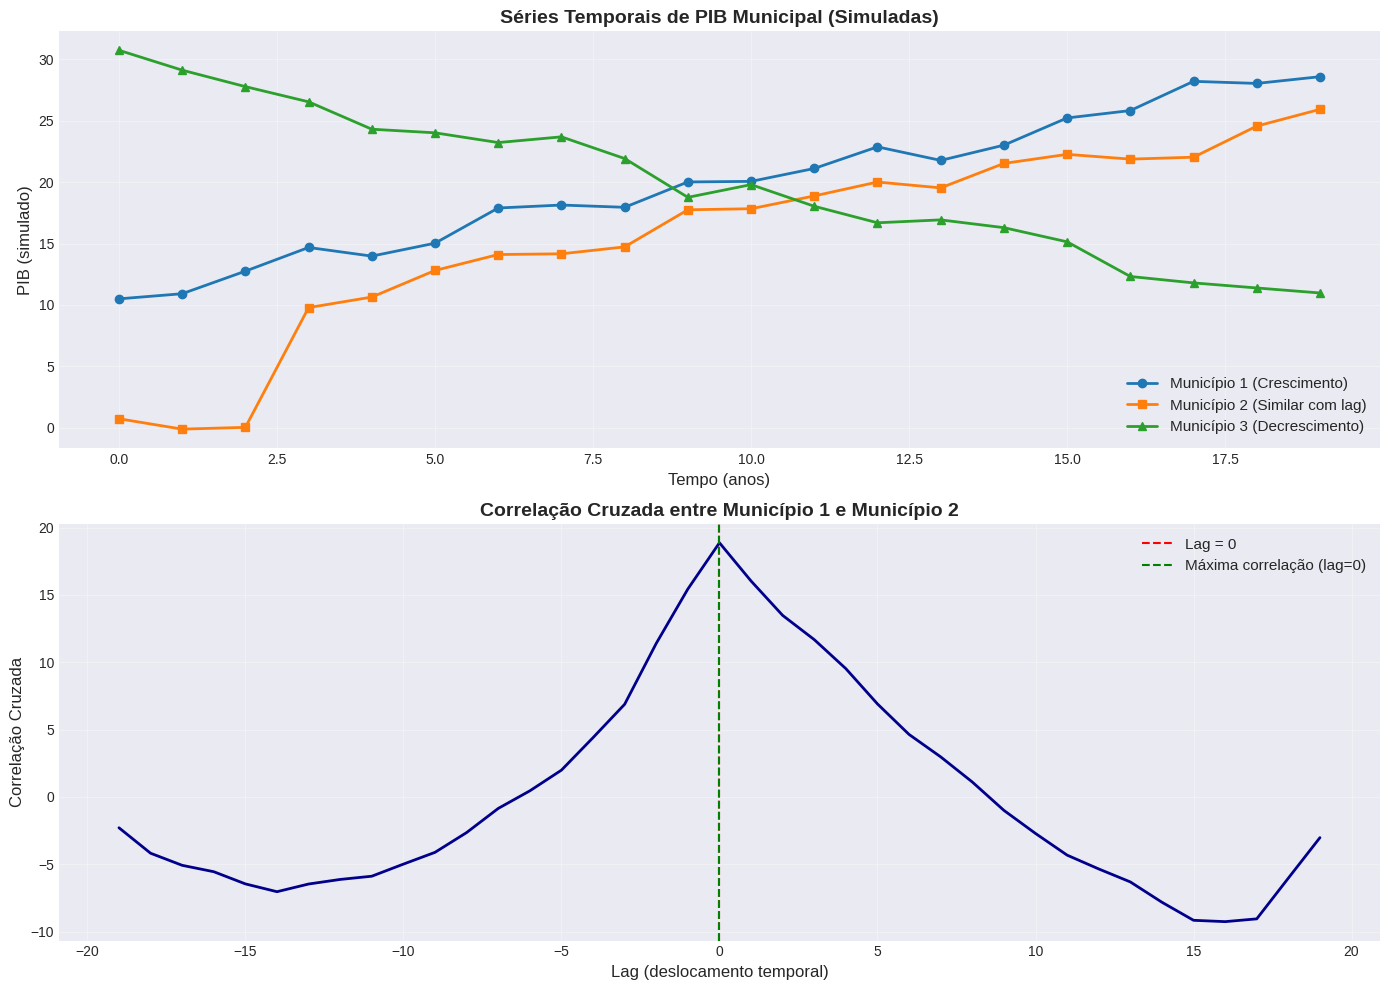


✓ Lag com maior correlação: 0
✓ Valor da correlação máxima: 18.8691

📊 Interpretação:
   • Município 1 e 2 têm padrões similares, mas deslocados no tempo
   • Município 3 tem comportamento oposto
   • A correlação cruzada captura essa similaridade temporal


In [8]:
# Exemplo prático: Correlação Cruzada entre séries temporais simuladas
print("=" * 80)
print("EXEMPLO: CORRELAÇÃO CRUZADA ENTRE SÉRIES TEMPORAIS")
print("=" * 80)

# Simular 3 séries temporais de municípios (ex: PIB ao longo de 20 anos)
np.random.seed(42)
time_points = 20

# Série 1: Crescimento linear
serie1 = np.linspace(10, 30, time_points) + np.random.normal(0, 1, time_points)

# Série 2: Similar à série 1, mas com lag de 3 períodos
serie2 = np.concatenate([np.zeros(3), serie1[:-3]]) + np.random.normal(0, 0.5, time_points)

# Série 3: Comportamento diferente (decrescimento)
serie3 = np.linspace(30, 10, time_points) + np.random.normal(0, 1, time_points)

# Padronizar as séries
serie1_norm = zscore(serie1)
serie2_norm = zscore(serie2)
serie3_norm = zscore(serie3)

# Calcular correlação cruzada
cross_corr_12 = np.correlate(serie1_norm, serie2_norm, mode='full')
lags = np.arange(-len(serie1_norm)+1, len(serie1_norm))

# Visualizar
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot das séries
axes[0].plot(serie1, 'o-', label='Município 1 (Crescimento)', linewidth=2, markersize=6)
axes[0].plot(serie2, 's-', label='Município 2 (Similar com lag)', linewidth=2, markersize=6)
axes[0].plot(serie3, '^-', label='Município 3 (Decrescimento)', linewidth=2, markersize=6)
axes[0].set_xlabel('Tempo (anos)', fontsize=12)
axes[0].set_ylabel('PIB (simulado)', fontsize=12)
axes[0].set_title('Séries Temporais de PIB Municipal (Simuladas)', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot da correlação cruzada
axes[1].plot(lags, cross_corr_12, linewidth=2, color='darkblue')
axes[1].axvline(x=0, color='red', linestyle='--', label='Lag = 0')
max_corr_idx = np.argmax(cross_corr_12)
max_lag_value = lags[max_corr_idx]
axes[1].axvline(x=max_lag_value, color='green', linestyle='--',
                label=f'Máxima correlação (lag={max_lag_value})')
axes[1].set_xlabel('Lag (deslocamento temporal)', fontsize=12)
axes[1].set_ylabel('Correlação Cruzada', fontsize=12)
axes[1].set_title('Correlação Cruzada entre Município 1 e Município 2', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Lag com maior correlação: {max_lag_value}")
print(f"✓ Valor da correlação máxima: {cross_corr_12[max_corr_idx]:.4f}")
print("\n📊 Interpretação:")
print("   • Município 1 e 2 têm padrões similares, mas deslocados no tempo")
print("   • Município 3 tem comportamento oposto")
print("   • A correlação cruzada captura essa similaridade temporal")

## 3.2 Algoritmo de Clusterização Escolhido e Justificativa

### Algoritmo recomendado: **Hierarchical Clustering (Aglomerativo)**

### Justificativas:

✅ **Aceita diretamente matriz de distância/similaridade** (ex.: 1 − correlação)  
✅ **Cria clusters em diferentes níveis** (dendrograma)  
✅ **Robusto a formatos de séries diferentes**  
✅ **Não requer k pré-definido**  
✅ **Adequado para séries com lag**

**Alternativamente:** k-Medoids (PAM) quando se usa DTW.

EXEMPLO: HIERARCHICAL CLUSTERING COM CORRELAÇÃO CRUZADA


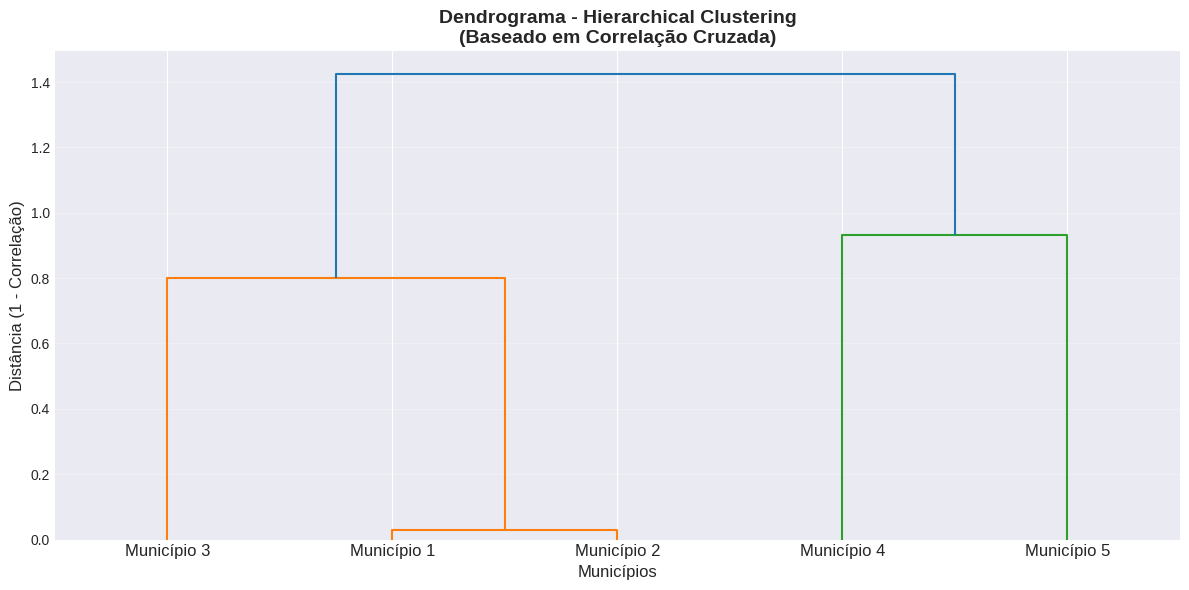


✓ Dendrograma gerado!

📊 Interpretação:
   • Municípios similares são agrupados em níveis mais baixos
   • A altura indica dissimilaridade
   • Pode-se cortar em diferentes alturas para obter k clusters


In [9]:
# Exemplo: Hierarchical Clustering com correlação
print("=" * 80)
print("EXEMPLO: HIERARCHICAL CLUSTERING COM CORRELAÇÃO CRUZADA")
print("=" * 80)

# Criar matriz de séries (5 municípios, 20 anos)
n_municipios = 5
n_anos = 20
np.random.seed(42)

series_temporais = []
nomes_municipios = [f'Município {i+1}' for i in range(n_municipios)]

# Gerar séries com padrões diferentes
for i in range(n_municipios):
    if i < 2:  # Grupo 1: Crescimento
        serie = np.linspace(10, 30, n_anos) + np.random.normal(0, 1, n_anos)
    elif i < 4:  # Grupo 2: Estável
        serie = np.ones(n_anos) * 20 + np.random.normal(0, 2, n_anos)
    else:  # Grupo 3: Decrescimento
        serie = np.linspace(30, 10, n_anos) + np.random.normal(0, 1, n_anos)
    series_temporais.append(zscore(serie))

series_matrix = np.array(series_temporais)

# Matriz de correlação
correlation_matrix = np.corrcoef(series_matrix)
distance_matrix = 1 - correlation_matrix

# Hierarchical Clustering
from scipy.spatial.distance import squareform
condensed_dist = squareform(distance_matrix)
Z = linkage(condensed_dist, method='average')

# Dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=nomes_municipios, leaf_font_size=12)
plt.title('Dendrograma - Hierarchical Clustering\n(Baseado em Correlação Cruzada)',
          fontsize=14, fontweight='bold')
plt.xlabel('Municípios', fontsize=12)
plt.ylabel('Distância (1 - Correlação)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n✓ Dendrograma gerado!")
print("\n📊 Interpretação:")
print("   • Municípios similares são agrupados em níveis mais baixos")
print("   • A altura indica dissimilaridade")
print("   • Pode-se cortar em diferentes alturas para obter k clusters")

## 3.3 Caso de Uso da Solução Projetada

### **Caso de Uso: Identificar municípios com trajetórias econômicas semelhantes**

#### Exemplos de séries temporais:
- PIB municipal de 2000 a 2024
- População anual
- Receita vs despesa ao longo do tempo
- Evolução do IDHM

#### Valor gerado:
✅ Detectar padrões de crescimento similares  
✅ Suporte a políticas públicas direcionadas  
✅ Comparação justa entre regiões  
✅ Planejamento orçamentário  
✅ Identificação de crescimento/estagnação/declínio

CASO DE USO: TRAJETÓRIAS ECONÔMICAS MUNICIPAIS


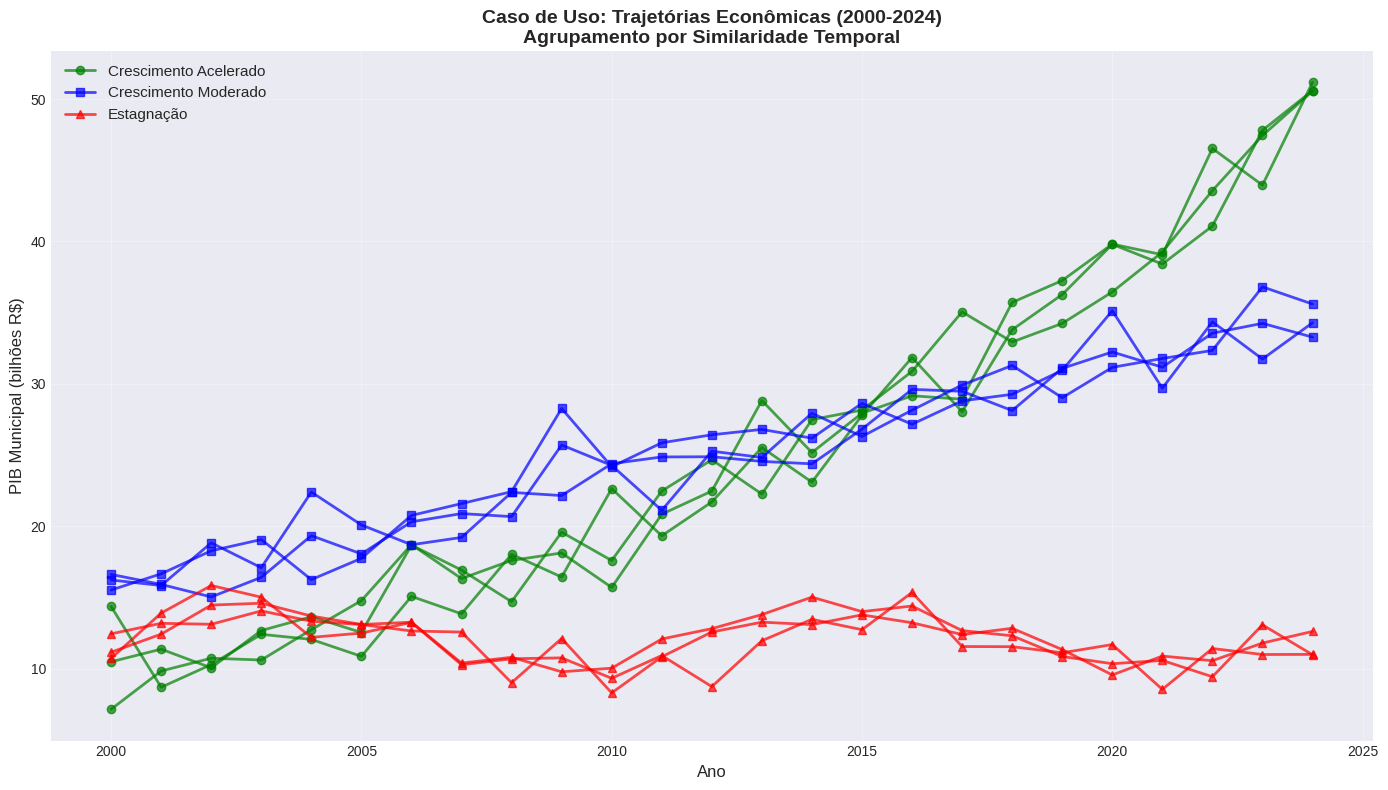


✓ Visualização concluída

💡 Aplicação Prática:
   • Grupo 1 (verde): Investir em infraestrutura
   • Grupo 2 (azul): Diversificação econômica
   • Grupo 3 (vermelho): Revitalização e atração de investimentos


In [10]:
# Visualização do caso de uso
print("=" * 80)
print("CASO DE USO: TRAJETÓRIAS ECONÔMICAS MUNICIPAIS")
print("=" * 80)

# Simular evolução de PIB de 3 grupos
anos = np.arange(2000, 2025)
n_anos_caso = len(anos)

# Grupo 1: Crescimento acelerado
grupo1_media = np.exp(np.linspace(np.log(10), np.log(50), n_anos_caso))
grupo1_municipios = [grupo1_media + np.random.normal(0, 2, n_anos_caso) for _ in range(3)]

# Grupo 2: Crescimento moderado
grupo2_media = np.linspace(15, 35, n_anos_caso)
grupo2_municipios = [grupo2_media + np.random.normal(0, 1.5, n_anos_caso) for _ in range(3)]

# Grupo 3: Estagnação
grupo3_media = np.ones(n_anos_caso) * 12 + np.sin(np.linspace(0, 4*np.pi, n_anos_caso)) * 2
grupo3_municipios = [grupo3_media + np.random.normal(0, 1, n_anos_caso) for _ in range(3)]

# Plotar
plt.figure(figsize=(14, 8))

for i, serie in enumerate(grupo1_municipios):
    plt.plot(anos, serie, 'o-', color='green', alpha=0.7, linewidth=2,
             label='Crescimento Acelerado' if i == 0 else '')

for i, serie in enumerate(grupo2_municipios):
    plt.plot(anos, serie, 's-', color='blue', alpha=0.7, linewidth=2,
             label='Crescimento Moderado' if i == 0 else '')

for i, serie in enumerate(grupo3_municipios):
    plt.plot(anos, serie, '^-', color='red', alpha=0.7, linewidth=2,
             label='Estagnação' if i == 0 else '')

plt.xlabel('Ano', fontsize=12)
plt.ylabel('PIB Municipal (bilhões R$)', fontsize=12)
plt.title('Caso de Uso: Trajetórias Econômicas (2000-2024)\nAgrupamento por Similaridade Temporal',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Visualização concluída")
print("\n💡 Aplicação Prática:")
print("   • Grupo 1 (verde): Investir em infraestrutura")
print("   • Grupo 2 (azul): Diversificação econômica")
print("   • Grupo 3 (vermelho): Revitalização e atração de investimentos")

## 3.4 Segunda Estratégia: DTW (Dynamic Time Warping)

**DTW** mede similaridade mesmo quando:

✅ Séries têm **velocidades diferentes**  
✅ Eventos ocorrem em **momentos deslocados**  
✅ Há **alongamentos/compressões** no tempo  
✅ Séries **não são linearmente relacionadas**

### Por que usar DTW?
- Mais flexível que correlação cruzada
- Captura tendências similares em ritmos diferentes
- Recomendado para formatos não lineares

### Aplicação:
1. Gerar matriz DTW NxN
2. Usar Hierarchical Clustering ou K-Medoids
3. Interpretar clusters baseados em trajetória

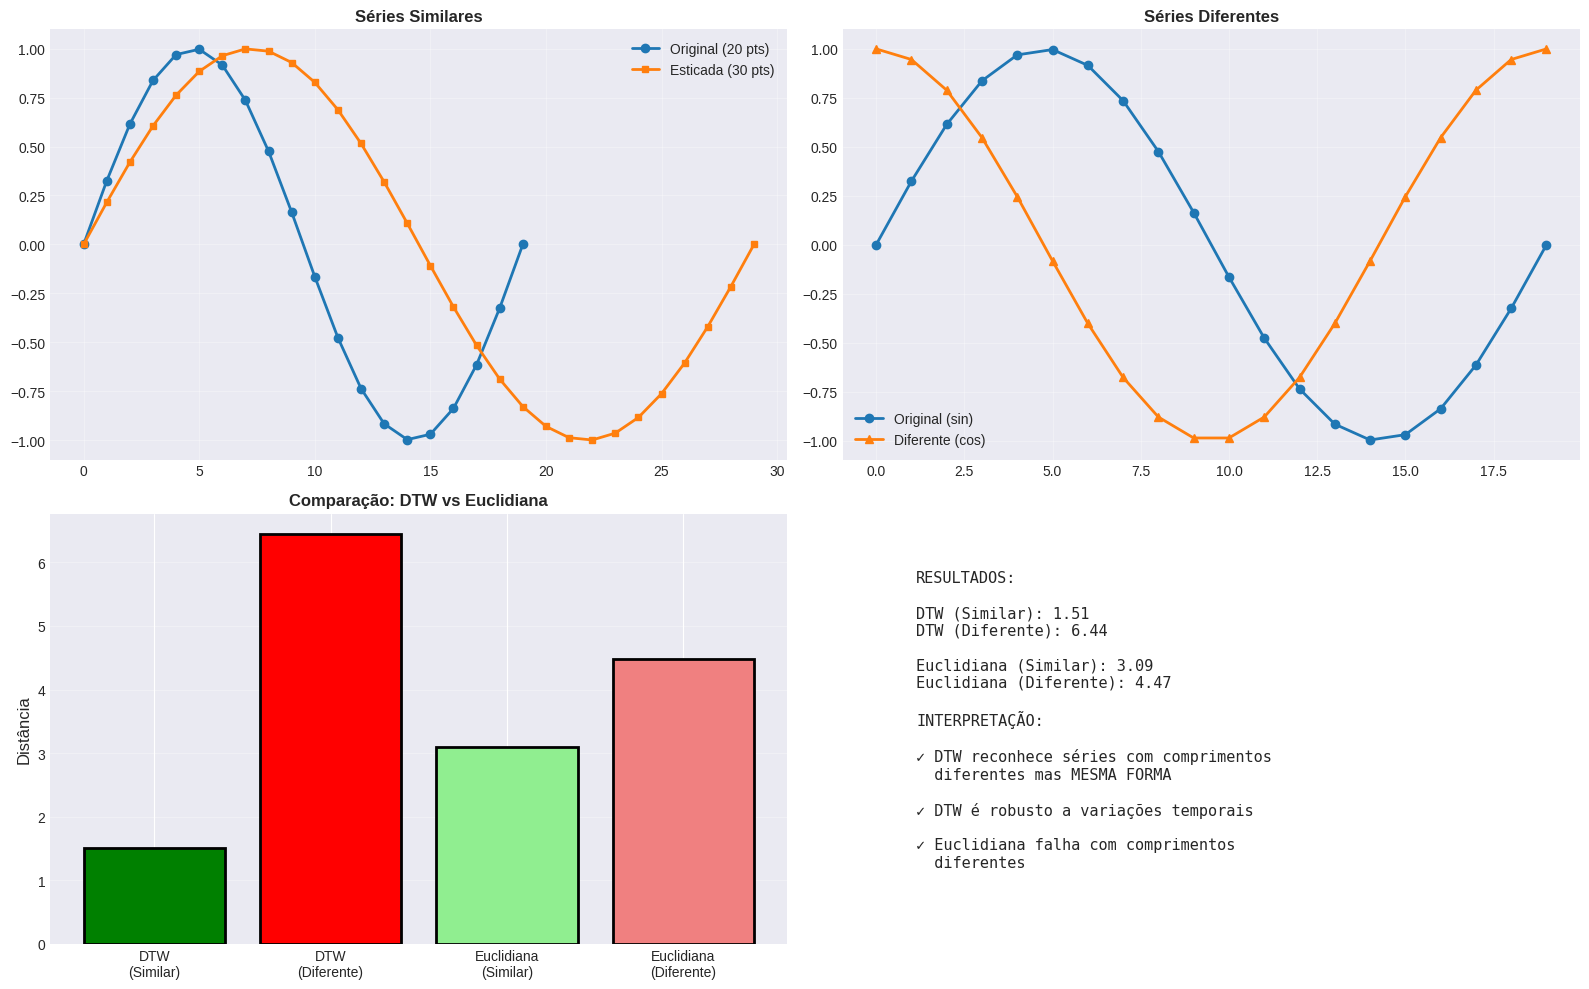


✓ Comparação DTW vs Euclidiana concluída

📊 DTW identificou corretamente as séries similares
   (DTW: 1.51 vs 6.44)


In [ ]:
# Implementação simplificada de DTW
def dtw_distance(s1, s2):
    n, m = len(s1), len(s2)
    dtw_matrix = np.zeros((n+1, m+1))

    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0

    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s1[i-1] - s2[j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],
                                          dtw_matrix[i, j-1],
                                          dtw_matrix[i-1, j-1])
    return dtw_matrix[n, m]

# Criar séries: uma é versão "esticada" da outra
serie_original = np.sin(np.linspace(0, 2*np.pi, 20))
serie_esticada = np.sin(np.linspace(0, 2*np.pi, 30))
serie_diferente = np.cos(np.linspace(0, 2*np.pi, 20))

# Calcular distâncias
dist_dtw_similar = dtw_distance(serie_original, serie_esticada)
dist_dtw_diferente = dtw_distance(serie_original, serie_diferente)
dist_euclidiana_similar = np.linalg.norm(serie_original - serie_esticada[:20])
dist_euclidiana_diferente = np.linalg.norm(serie_original - serie_diferente)

# Visualizar
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

axes[0, 0].plot(serie_original, 'o-', label='Original (20 pts)', linewidth=2, markersize=6)
axes[0, 0].plot(serie_esticada, 's-', label='Esticada (30 pts)', linewidth=2, markersize=4)
axes[0, 0].set_title('Séries Similares', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(serie_original, 'o-', label='Original (sin)', linewidth=2, markersize=6)
axes[0, 1].plot(serie_diferente, '^-', label='Diferente (cos)', linewidth=2, markersize=6)
axes[0, 1].set_title('Séries Diferentes', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

metricas = ['DTW\n(Similar)', 'DTW\n(Diferente)', 'Euclidiana\n(Similar)', 'Euclidiana\n(Diferente)']
valores = [dist_dtw_similar, dist_dtw_diferente, dist_euclidiana_similar, dist_euclidiana_diferente]
cores = ['green', 'red', 'lightgreen', 'lightcoral']

axes[1, 0].bar(metricas, valores, color=cores, edgecolor='black', linewidth=2)
axes[1, 0].set_ylabel('Distância', fontsize=12)
axes[1, 0].set_title('Comparação: DTW vs Euclidiana', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

axes[1, 1].axis('off')
texto = f"""RESULTADOS:

DTW (Similar): {dist_dtw_similar:.2f}
DTW (Diferente): {dist_dtw_diferente:.2f}

Euclidiana (Similar): {dist_euclidiana_similar:.2f}
Euclidiana (Diferente): {dist_euclidiana_diferente:.2f}

INTERPRETAÇÃO:

✓ DTW reconhece séries com comprimentos
  diferentes mas MESMA FORMA

✓ DTW é robusto a variações temporais

✓ Euclidiana falha com comprimentos
  diferentes
"""
axes[1, 1].text(0.1, 0.5, texto, fontsize=11, family='monospace', verticalalignment='center')

plt.tight_layout()
plt.show()

print("\n✓ Comparação DTW vs Euclidiana concluída")
print(f"\n📊 DTW identificou corretamente as séries similares")
print(f"   (DTW: {dist_dtw_similar:.2f} vs {dist_dtw_diferente:.2f})")

## 3.5 Resumo: Resposta às Questões Listastada.

### ✅ **Questão 1:** Passos para correlação cruzada?
 Seção 3.1: padronizar, definir lags, calcular, selecionar máxima, construir matriz, usar em clusterização.

### ✅ **Questão 2:** Algoritmo escolhido e justificativa?
Seção 3.2: **Hierarchical Clustering** — aceita matriz de distância, dendrograma, robusto, sem k pré-definido.

### ✅ **Questão 3:** Caso de uso?
 Seção 3.3: **Trajetórias econômicas municipais** — políticas públicas, planejamento, identificação de padrões.

### ✅ **Questão 4:** Segunda estratégia?
 Seção 3.4: **DTW** — flexível, captura padrões não lineares, alinhamento temporal.

---



---
# 4. Análise Exploratória de Dados (EDA)

*A partir daqui, continuamos com a análise do dataset IBGE.*